1. In a 2-class classification problem, 
On a single 2D plot, plot the 2 class means, and make a filled-contour plot of constant Mahalanobis distances from the mean for each class, as follows: 𝑑# "𝑥, 𝑚 ' = 𝐵# and
𝑑 "𝑥, 𝑚 ' = 𝐵#, for values 𝐵 = 0.5, 1.0, 1.5, 2.0. (End result should be 4 curves for $
𝑑 "𝑥,𝑚 ' = 𝐵# and 4 curves for 𝑑# "𝑥,𝑚 ' = 𝐵# , with colored fills between the $" $
curves.)
Tips:
(1) Use matplotlib.pyplot.contourf for the filled-contour plot; use the levels parameter to input the values of 𝐵#; be mindful of 𝐵 vs. 𝐵#.
(2) Here is one way to correctly plot the figure. You can calculate the value of the multivariate Gaussian by using 𝑑# = 𝐵#; for each value of 𝐵#, the corresponding
output value of the multivariate Gaussian gives you a level value. Then, you can concatenate all level values together and utilize such values to assign the levels parameter in plt.contourf().

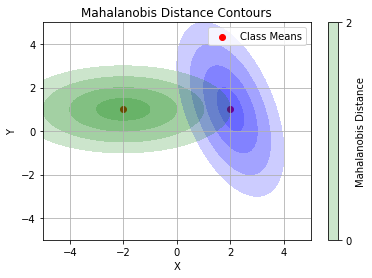

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define class means
m1 = np.array([[2], [1]])
m2 = np.array([[-2], [1]])

# Define covariance matrices
Sigma1 = np.array([[1, -1], [-1, 4]])
Sigma2 = np.array([[4, 0], [0, 1]])

# Generate grid for plotting
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
pos = np.dstack((x, y))

# Mahalanobis distance function
def mahalanobis_distance(x, mean, cov):
    diff = x - mean.reshape(1, 1, -1)
    inv_cov = np.linalg.inv(cov)
    return np.sqrt(np.sum(diff @ inv_cov * diff, axis=-1))

# Calculate Mahalanobis distances for each class
B_values = [0.5, 1.0, 1.5, 2.0]
distances_class1 = [mahalanobis_distance(pos, m1, Sigma1) for B in B_values]
distances_class2 = [mahalanobis_distance(pos, m2, Sigma2) for B in B_values]

# Plot class means
plt.scatter([m1[0], m2[0]], [m1[1], m2[1]], color='red', label='Class Means')

# Plot filled contour plots for each class
for i, B in enumerate(B_values):
    plt.contourf(x, y, distances_class1[i], levels=[0, B], colors=['blue'], alpha=0.2)
    plt.contourf(x, y, distances_class2[i], levels=[0, B], colors=['green'], alpha=0.2)

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mahalanobis Distance Contours')
plt.legend()
plt.colorbar(label='Mahalanobis Distance')
plt.grid(True)

# Show plot
plt.show()


(c)This part is done by computer. For the means and covariance matrices given in (a), use your answer to (b) to plot the decision regions and boundaries of the Bayes classifier for minimum error. Also show the class means on the plot. Do this for 3 cases (1 plot for each case):

For case 1: P(S1) = P(S2) = 0.5

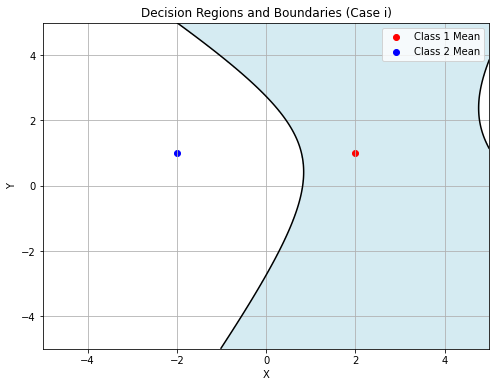

In [10]:

# Calculate inverse covariance matrices
inv_Sigma1 = np.linalg.inv(Sigma1)
inv_Sigma2 = np.linalg.inv(Sigma2)

# Define prior probabilities
P_S1 = 0.5
P_S2 = 0.5

# Generate grid for plotting
x, y = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
pos = np.dstack((x, y))

# Calculate Mahalanobis distances for each class
d1 = np.sqrt(np.sum((pos - m1) @ inv_Sigma1 * (pos - m1), axis=-1))
d2 = np.sqrt(np.sum((pos - m2) @ inv_Sigma2 * (pos - m2), axis=-1))

# Calculate decision regions
decision_regions = np.where(d1 < d2, 1, 2)

# Plot decision regions and boundaries
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, d1 - d2, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case i)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

1.(c)

For case 2: P(S1) = P(S2) = 0.7

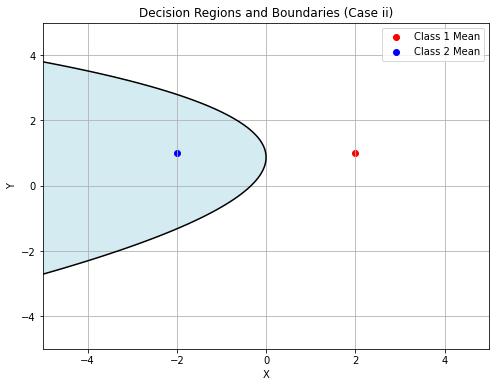

In [12]:
# Case (ii): P(S1) = 0.3, P(S2) = 0.7
P_S1_case2 = 0.3
P_S2_case2 = 0.7

# Calculate Mahalanobis distances for each class
d1_case2 = np.sqrt(np.sum((pos - m1) @ inv_Sigma1 * (pos - m1), axis=-1))
d2_case2 = np.sqrt(np.sum((pos - m2) @ inv_Sigma2 * (pos - m2), axis=-1))

# Calculate decision regions
decision_regions_case2 = np.where(P_S1_case2 * d1_case2 - P_S2_case2 * d2_case2 < 0, 2, 1)

# Plot decision regions and boundaries for Case (ii)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_case2, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, P_S1_case2 * d1_case2 - P_S2_case2 * d2_case2, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case ii)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

(1) (c)

For case 2: P(S1) = P(S2) = 0.9

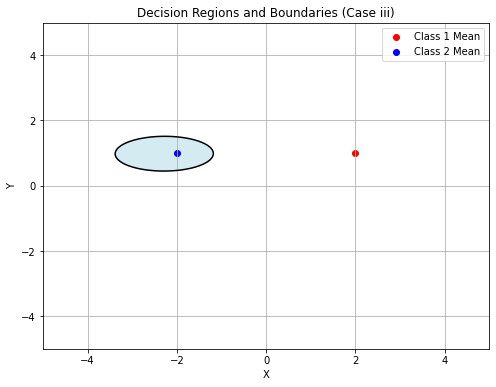

In [13]:

# Case (iii): P(S1) = 0.1, P(S2) = 0.9
P_S1_case3 = 0.1
P_S2_case3 = 0.9

# Calculate Mahalanobis distances for each class
d1_case3 = np.sqrt(np.sum((pos - m1) @ inv_Sigma1 * (pos - m1), axis=-1))
d2_case3 = np.sqrt(np.sum((pos - m2) @ inv_Sigma2 * (pos - m2), axis=-1))

# Calculate decision regions
decision_regions_case3 = np.where(P_S1_case3 * d1_case3 - P_S2_case3 * d2_case3 < 0, 2, 1)

# Plot decision regions and boundaries for Case (iii)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_case3, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, P_S1_case3 * d1_case3 - P_S2_case3 * d2_case3, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case iii)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Question 1 Part D

Case 1

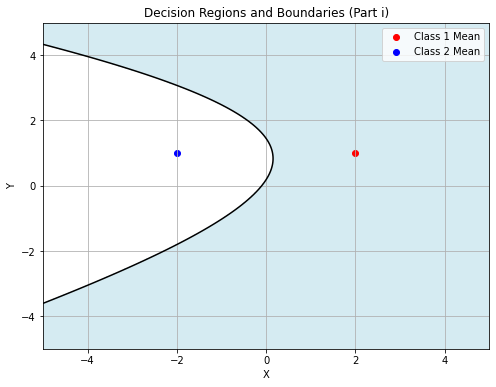

In [14]:
# Define covariance matrices for part (i)
Sigma1_i = 4 * np.array([[1, -1], [-1, 4]])
Sigma2_i = Sigma2  # Reuse Sigma2 from part (a)

# Calculate inverse covariance matrices for part (i)
inv_Sigma1_i = np.linalg.inv(Sigma1_i)
inv_Sigma2_i = np.linalg.inv(Sigma2_i)

# Calculate Mahalanobis distances for each class for part (i)
d1_i = np.sqrt(np.sum((pos - m1) @ inv_Sigma1_i * (pos - m1), axis=-1))
d2_i = np.sqrt(np.sum((pos - m2) @ inv_Sigma2_i * (pos - m2), axis=-1))

# Calculate decision regions for part (i)
decision_regions_i = np.where(d1_i < d2_i, 1, 2)

# Plot decision regions and boundaries for part (i)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_i, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, d1_i - d2_i, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Part i)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Case 2

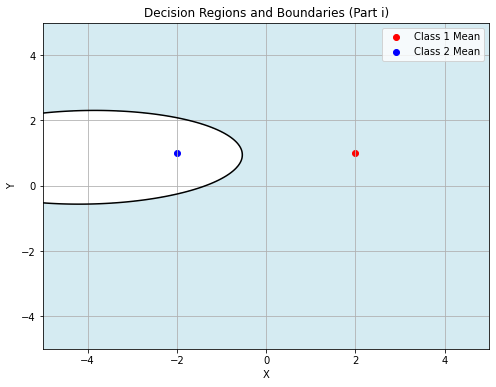

In [16]:
# Define covariance matrices for part (i)
Sigma1_ii = 16 * np.array([[1, -1], [-1, 4]])
Sigma2_ii = Sigma2  # Reuse Sigma2 from part (a)

# Calculate inverse covariance matrices for part (i)
inv_Sigma1_ii = np.linalg.inv(Sigma1_ii)
inv_Sigma2_ii = np.linalg.inv(Sigma2_ii)

# Calculate Mahalanobis distances for each class for part (i)
d1_ii = np.sqrt(np.sum((pos - m1) @ inv_Sigma1_ii * (pos - m1), axis=-1))
d2_ii = np.sqrt(np.sum((pos - m2) @ inv_Sigma2_ii * (pos - m2), axis=-1))

# Calculate decision regions for part (i)
decision_regions_ii = np.where(d1_ii < d2_ii, 1, 2)

# Plot decision regions and boundaries for part (i)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_ii, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, d1_ii - d2_ii, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Part ii)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Case 3

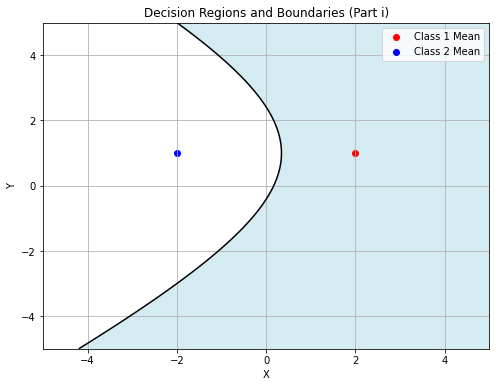

In [18]:
# Define covariance matrices for part (iii)
Sigma1_iii = np.array([[2, 0], [0, 2]])
Sigma2_iii = Sigma2  # Reuse Sigma2 from part (a)

# Calculate inverse covariance matrices for part (iii)
inv_Sigma1_iii = np.linalg.inv(Sigma1_iii)
inv_Sigma2_iii = np.linalg.inv(Sigma2_iii)

# Calculate Mahalanobis distances for each class for part (iii)
d1_iii = np.sqrt(np.sum((pos - m1) @ inv_Sigma1_iii * (pos - m1), axis=-1))
d2_iii = np.sqrt(np.sum((pos - m2) @ inv_Sigma2_iii * (pos - m2), axis=-1))

# Calculate decision regions for part (iii)
decision_regions_iii = np.where(d1_iii < d2_iii, 1, 2)

# Plot decision regions and boundaries for part (iii)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_iii, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, d1_iii - d2_iii, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Part iii)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Case 4

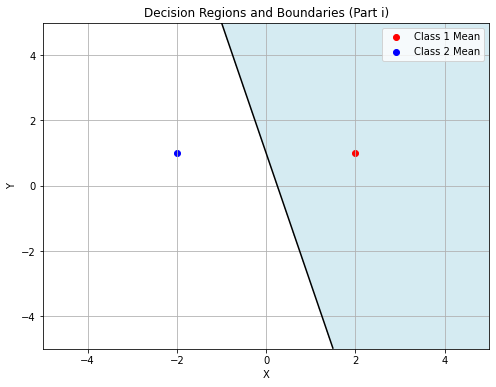

In [19]:
# Define covariance matrices for part (iii)
Sigma1_iv = Sigma1
Sigma2_iv = np.array([[1, -1], [-1, 4]])  # Reuse Sigma2 from part (a)

# Calculate inverse covariance matrices for part (iii)
inv_Sigma1_iv = np.linalg.inv(Sigma1_iv)
inv_Sigma2_iv = np.linalg.inv(Sigma2_iv)

# Calculate Mahalanobis distances for each class for part (iii)
d1_iv = np.sqrt(np.sum((pos - m1) @ inv_Sigma1_iv * (pos - m1), axis=-1))
d2_iv = np.sqrt(np.sum((pos - m2) @ inv_Sigma2_iv * (pos - m2), axis=-1))

# Calculate decision regions for part (iii)
decision_regions_iv = np.where(d1_iv < d2_iv, 1, 2)

# Plot decision regions and boundaries for part (iii)
plt.figure(figsize=(8, 6))
plt.contourf(x, y, decision_regions_iv, levels=[0.5, 1.5], colors=['lightblue', 'lightgreen'], alpha=0.5)
plt.contour(x, y, d1_iv - d2_iv, levels=[0], colors='black')

# Plot class means
plt.scatter(m1[0], m1[1], color='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], color='blue', marker='o', label='Class 2 Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Part iv)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Question 2:

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data points for class S1 and S2
# S1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])
# S2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# # Binary kernel function
# def binary_kernel(u):
#     return np.where(np.abs(u) <= 1, 1 / np.abs(u), 0)

# # Compute KDE estimates for each class
# def kde_estimate(x, data):
#     n = len(data)
#     h = 1
#     total = 0
#     for xi in data:
#         total += binary_kernel((x - xi) / h)
#     return total / (n * h)

# # Range of x values from the minimum value of S1 to the maximum value of S2
# x_range = np.linspace(np.min(S1), np.max(S2), 1000)

# # Compute KDE estimates for both classes
# kde_S1 = [kde_estimate(x, S1) for x in x_range]
# kde_S2 = [kde_estimate(x, S2) for x in x_range]

# # Plot the KDE estimates
# plt.plot(x_range, kde_S1, label='KDE Estimate for S1')
# plt.plot(x_range, kde_S2, label='KDE Estimate for S2')
# plt.xlabel('x')
# plt.ylabel('Density')
# plt.title('KDE Estimates of Density Functions')
# plt.legend()
# plt.grid(True)
# plt.show()


In [32]:
# # Find decision boundaries
# decision_boundaries = []
# for i in range(len(x_range) - 1):
#     if np.sign(kde_S1[i] - kde_S2[i]) != np.sign(kde_S1[i+1] - kde_S2[i+1]):
#         decision_boundaries.append((x_range[i], x_range[i+1]))

# # Determine decision regions
# decision_regions = []
# for boundary in decision_boundaries:
#     region = []
#     for x in x_range:
#         density_S1 = kde_estimate(x, S1)
#         density_S2 = kde_estimate(x, S2)
#         if density_S1 > density_S2:
#             region.append((x, 1))  # Class S1
#         elif density_S1 < density_S2:
#             region.append((x, 2))  # Class S2
#         else:
#             # Handle tie by assigning to the class with higher prior probability
#             if prior_S1 > prior_S2:
#                 region.append((x, 1))  # Class S1
#             else:
#                 region.append((x, 2))  # Class S2
#     decision_regions.append(region)

# # Print decision boundaries
# print("Decision Boundaries:")
# for boundary in decision_boundaries:
#     print("x =", boundary[0], "and x =", boundary[1])

# # Print decision regions
# print("\nDecision Regions:")
# for i, region in enumerate(decision_regions):
#     print("Region", i+1, ":", region[:5], "...", region[-5:])


2.(a) Graph the KDE estimates of the density functions p(x S1) and p(x S2 ) . Be sure to
label pertinent values on both axes.

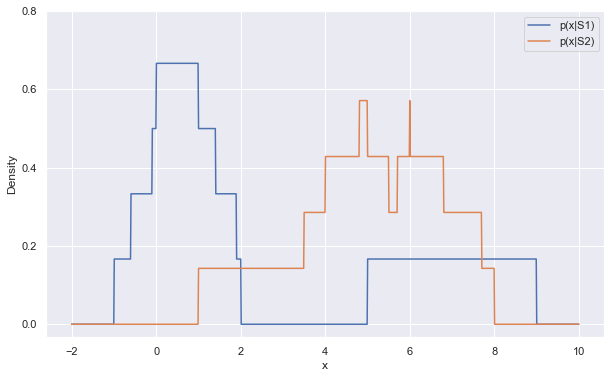

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data points for class ω1
X1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])

# Data points for class ω2
X2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# Bandwidth for KDE
h = 1

# Kernel function
def kernel(u):
    return 1 if abs(u) <= 1 else 0

# KDE estimate for class S1
def f1(x):
    density = 0
    for xi in X1:
        density += kernel((x - xi) / h)
    density /= len(X1)
    return density

# KDE estimate for class S2
def f2(x):
    density = 0
    for xi in X2:
        density += kernel((x - xi) / h)
    density /= len(X2)
    return density

# Range of x values for plotting
x_range = np.linspace(min(min(X1), min(X2)) - 2, max(max(X1), max(X2)) + 2, 1000)

# Calculate density estimates for plotting
f1_plot = [f1(x) for x in x_range]
f2_plot = [f2(x) for x in x_range]

# Plot the KDE estimates
plt.figure(figsize=(10, 6))
plt.plot(x_range, f1_plot, label='p(x|S1)')
plt.plot(x_range, f2_plot, label='p(x|S2)')

# Label axes
plt.xlabel('x')
plt.ylabel('Density')

# Label pertinent values
plt.xticks(np.arange(int(min(x_range)), int(max(x_range)) + 1, 2))
plt.yticks(np.arange(0, max(max(f1_plot), max(f2_plot)) + 0.2, 0.2))

# Add legend
plt.legend()

# Show the plot
plt.show()

2. (b) Estimate the prior probabilities based on frequency of occurrence of the data points in each class.

In [28]:
# Data points for class ω1
X1 = [0, 0.4, 0.9, 1.0, 6.0, 8.0]

# Data points for class ω2
X2 = [2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0]

# Total number of data points
total_points = len(X1) + len(X2)

# Number of data points in class s1
num_points_1 = len(X1)

# Number of data points in class s2
num_points_2 = len(X2)

# Prior probability for class ω1
prior_prob_1 = num_points_1 / total_points

# Prior probability for class ω2
prior_prob_2 = num_points_2 / total_points

print("Prior Probability for Class s1 (P(s1)):", prior_prob_1)
print("Prior Probability for Class s2 (P(s2)):", prior_prob_2)

Prior Probability for Class s1 (P(s1)): 0.46153846153846156
Prior Probability for Class s2 (P(s2)): 0.5384615384615384


2. (c) Use the estimates you have developed in (a)-(b) above to find the decision boundaries and regions for a Bayes minimum-error classifier based on KDE.
Tips: (1) In the case of a tie, use the following ad-hoc rule: assign x to the class with the higher prior. (2) Only the part of feature space where at least one density is nonzero need be classified.

In [30]:
import numpy as np

# Data points for class S1
X1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])

# Data points for class S2
X2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# Prior probabilities
prior_prob_1 = len(X1) / (len(X1) + len(X2))
prior_prob_2 = len(X2) / (len(X1) + len(X2))

# Bandwidth for KDE
h = 1

# Kernel function
def kernel(u):
    return 1 if abs(u) <= 1 else 0

# KDE estimate for class S1
def f1(x):
    density = 0
    for xi in X1:
        density += kernel((x - xi) / h)
    density /= len(X1)
    return density

# KDE estimate for class S2
def f2(x):
    density = 0
    for xi in X2:
        density += kernel((x - xi) / h)
    density /= len(X2)
    return density

# Range of x values to consider
x_range = np.linspace(min(min(X1), min(X2)), max(max(X1), max(X2)), 1000)

# Find decision boundaries and regions
decision_boundaries = []
decision_regions_1 = []
decision_regions_2 = []

for x in x_range:
    if f1(x) == 0 and f2(x) == 0:
        continue
    
    posterior_1 = (prior_prob_1 * f1(x)) / (prior_prob_1 * f1(x) + prior_prob_2 * f2(x))
    posterior_2 = (prior_prob_2 * f2(x)) / (prior_prob_1 * f1(x) + prior_prob_2 * f2(x))
    
    if posterior_1 == posterior_2:
        if prior_prob_2 > prior_prob_1:
            decision_regions_2.append(x)
        else:
            decision_regions_1.append(x)
    elif posterior_1 > posterior_2:
        decision_regions_1.append(x)
    else:
        decision_regions_2.append(x)
    
    if posterior_1 == posterior_2:
        decision_boundaries.append(x)

print("Decision Boundaries:")
print(decision_boundaries)

print("\nDecision Region for Class S1:")
print(decision_regions_1)

print("\nDecision Region for Class S2:")
print(decision_regions_2)

Decision Boundaries:
[]

Decision Region for Class S1:
[0.0, 0.008008008008008008, 0.016016016016016016, 0.024024024024024024, 0.03203203203203203, 0.04004004004004004, 0.04804804804804805, 0.056056056056056056, 0.06406406406406406, 0.07207207207207207, 0.08008008008008008, 0.08808808808808809, 0.0960960960960961, 0.1041041041041041, 0.11211211211211211, 0.12012012012012012, 0.12812812812812813, 0.13613613613613612, 0.14414414414414414, 0.15215215215215216, 0.16016016016016016, 0.16816816816816815, 0.17617617617617617, 0.1841841841841842, 0.1921921921921922, 0.20020020020020018, 0.2082082082082082, 0.21621621621621623, 0.22422422422422422, 0.23223223223223222, 0.24024024024024024, 0.24824824824824826, 0.25625625625625625, 0.26426426426426425, 0.27227227227227224, 0.2802802802802803, 0.2882882882882883, 0.2962962962962963, 0.30430430430430433, 0.3123123123123123, 0.3203203203203203, 0.3283283283283283, 0.3363363363363363, 0.34434434434434436, 0.35235235235235235, 0.36036036036036034, 0.

2.(d) Classify the points 3, 6.2, 8.5.

In [24]:
import numpy as np

# Data points for class S1
X1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])

# Data points for class S2
X2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# Combine data points
X = np.concatenate((X1, X2))

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to find the nearest neighbor
def find_nearest_neighbor(X, point):
    distances = [euclidean_distance(x, point) for x in X]
    nearest_idx = np.argmin(distances)
    return X[nearest_idx]

# Points to classify
points = [3, 6.2, 8.5]

# Classify the points using kNN with k=1
for point in points:
    nearest_neighbor = find_nearest_neighbor(X, point)
    if nearest_neighbor in X1:
        print(f"Point {point} is classified as class S1.")
    else:
        print(f"Point {point} is classified as class S2.")

Point 3 is classified as class S2.
Point 6.2 is classified as class S1.
Point 8.5 is classified as class S1.


2. (e) For a k-nearest-neighbor classifier, classify the same points as in (d), for each of the following values of k. Thus, you will make a total of 9 classifications (3 classifications for each part below).
Tip: In case of a tie (e.g., 2 data points are equidistant from the point to classify, and you have to pick just one of the data points), pick the data point whose class label has the larger prior.
(i) k = 1 (ii) k=3 (iii) k = 5

In [21]:
import numpy as np
from collections import Counter

# Data points for class ω1
X1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])

# Data points for class ω2
X2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# Combine data points and labels
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(len(X1)), np.ones(len(X2))))

# Prior probabilities
prior_prob_1 = len(X1) / len(X)
prior_prob_2 = len(X2) / len(X)

# Points to classify
points = [3, 6.2, 8.5]

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to find k nearest neighbors
def find_neighbors(X, y, point, k):
    distances = [euclidean_distance(x, point) for x in X]
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:k]
    k_nearest_labels = y[k_nearest_indices]
    return k_nearest_labels

# Function to classify a point using kNN
def knn_classify(X, y, point, k, prior_prob_1, prior_prob_2):
    k_nearest_labels = find_neighbors(X, y, point, k)
    counts = Counter(k_nearest_labels)
    if len(counts) == 1:
        majority_label = list(counts.keys())[0]
    else:
        label_0_count = counts.get(0, 0)
        label_1_count = counts.get(1, 0)
        if label_0_count == label_1_count:
            majority_label = 1 if prior_prob_2 > prior_prob_1 else 0
        else:
            majority_label = max(counts, key=counts.get)
    return majority_label

# Classify the given points for different values of k
for point in points:
    print(f"Point: {point}")
    for k in [1, 3, 5]:
        label = knn_classify(X, y, point, k, prior_prob_1, prior_prob_2)
        print(f"k = {k}: Classified as class {int(label)}")
    print()

Point: 3
k = 1: Classified as class 1
k = 3: Classified as class 1
k = 5: Classified as class 1

Point: 6.2
k = 1: Classified as class 0
k = 3: Classified as class 1
k = 5: Classified as class 1

Point: 8.5
k = 1: Classified as class 0
k = 3: Classified as class 1
k = 5: Classified as class 1



2. (f) For k = 1, draw a plot of the data points on the axis; also show the decision boundary and decision regions.

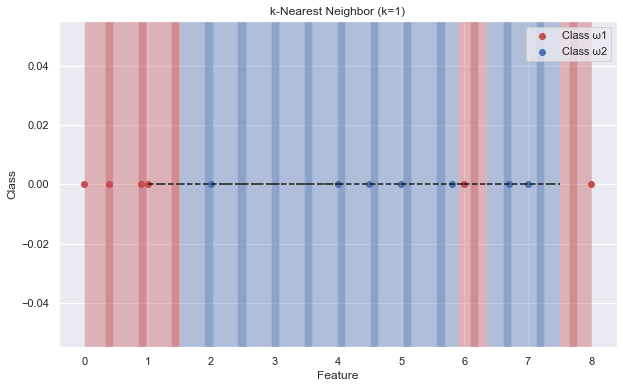

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data points for class ω1
X1 = np.array([0, 0.4, 0.9, 1.0, 6.0, 8.0])

# Data points for class ω2
X2 = np.array([2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0])

# Combine data points for plotting
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(len(X1)), np.ones(len(X2))))

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X1, np.zeros(len(X1)), color='r', label='Class ω1')
plt.scatter(X2, np.zeros(len(X2)), color='b', label='Class ω2')

# Determine the decision boundary
boundary_points = []
for i in range(len(X1)):
    for j in range(len(X2)):
        midpoint = (X1[i] + X2[j]) / 2
        boundary_points.append(midpoint)

boundary_points = sorted(set(boundary_points))

# Plot the decision boundary
for i in range(len(boundary_points) - 1):
    x1 = boundary_points[i]
    x2 = boundary_points[i + 1]
    y1 = 0
    y2 = 0
    plt.plot([x1, x2], [y1, y2], 'k--')

# Determine and shade the decision regions
regions = []
for x in np.linspace(min(X), max(X), 1000):
    distances = [abs(x - xi) for xi in X]
    nearest_idx = np.argmin(distances)
    nearest_label = y[nearest_idx]
    regions.append((x, nearest_label))

for region in regions:
    x, label = region
    if label == 0:
        plt.axvspan(x - 0.001, x + 0.001, alpha=0.2, color='r')
    else:
        plt.axvspan(x - 0.001, x + 0.001, alpha=0.2, color='b')

plt.title('k-Nearest Neighbor (k=1)')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.legend()
plt.show()